In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_excel('Airlines+Data.xlsx',index_col=0)
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


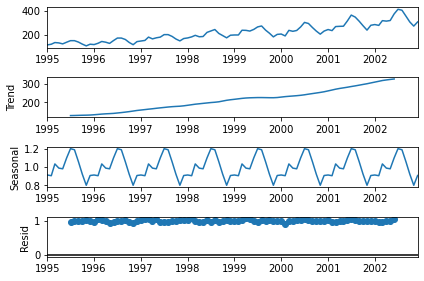

In [118]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(df,model='multiplicative')

In [8]:
from statsmodels.tsa.stattools import adfuller
adftest=adfuller(df)
print('p value of adfuller test: ',adftest[1])

p value of adfuller test:  0.9968250481137263


p value is greater than 0.05 which represents the series is not stationary 

In [9]:
df.shape

(96, 1)

In [10]:
train=df.head(84)
test=df.tail(12)

In [11]:
train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2001-08-01,347
2001-09-01,312
2001-10-01,274


In [12]:
test

,Passengers
Month,
2002-01-01,284
2002-02-01,277
2002-03-01,317
2002-04-01,313
2002-05-01,318
2002-06-01,374
2002-07-01,413
2002-08-01,405
2002-09-01,355


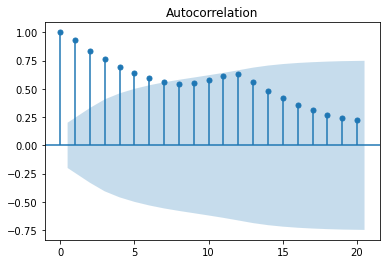

In [15]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df['Passengers']);

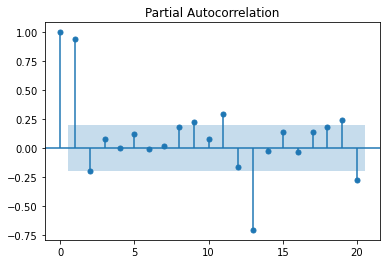

In [17]:
tsa_plots.plot_pacf(df['Passengers']);

In [101]:
#hyper parameter for pdq values
import itertools
p=q=range(0,9)
d=range(0,2)

In [102]:
pdq_combinations=list(itertools.product(p,d,q))

In [103]:
pdq_combinations

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 0, 8),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (1, 1, 8),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 0, 8),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (2, 1, 8),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 0, 8),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (3, 1, 8),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 0, 8),
 (4, 1, 0),
 (4, 1, 1),
 (4,

In [104]:
len(pdq_combinations)

162

In [105]:
from statsmodels.tsa.arima_model import ARIMA
import warnings

In [106]:
warnings.filterwarnings("ignore")

In [107]:
rmse=[]
order=[]
for pdq in pdq_combinations:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(df)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        rmse.append(error)
        order.append(pdq)
    except:
        continue

In [108]:
rsults=pd.DataFrame(data=rmse,index=order,columns=['RMSE'])

In [109]:
rsults.sort_values('RMSE')

,RMSE
"(7, 0, 2)",58.498477
"(6, 0, 2)",58.535012
"(8, 0, 4)",63.194650
"(8, 0, 0)",63.301384
"(5, 0, 0)",66.520049
...,...
"(5, 1, 3)",330.229075
"(2, 1, 3)",330.258355
"(4, 1, 5)",330.887910
"(4, 1, 4)",330.966791


order(7,0,2) gives the better rmse value when compared to the model built with other rmse value

In [110]:
model=ARIMA(train,order=(7, 0, 2)).fit()

In [111]:
pred=model.predict(start=len(train),end=(len(df)-1))

In [112]:
pred

2002-01-01    298.340988
2002-02-01    305.684933
2002-03-01    309.828168
2002-04-01    302.462297
2002-05-01    297.376322
2002-06-01    291.718120
2002-07-01    290.823549
2002-08-01    290.757378
2002-09-01    292.955762
2002-10-01    294.124297
2002-11-01    295.393391
2002-12-01    295.312119
Freq: MS, dtype: float64

In [90]:
test

,Passengers
Month,
2002-01-01,284
2002-02-01,277
2002-03-01,317
2002-04-01,313
2002-05-01,318
2002-06-01,374
2002-07-01,413
2002-08-01,405
2002-09-01,355


In [113]:
error=np.sqrt(mean_squared_error(test,pred))
error

58.49847687353772

<AxesSubplot:xlabel='Month'>

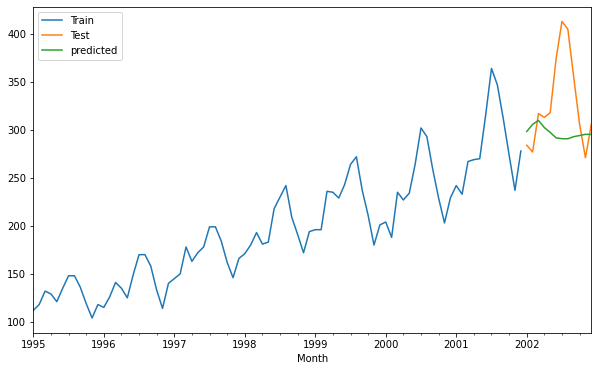

In [114]:
train['Passengers'].plot(legend=True, label='Train', figsize=(10,6))
test['Passengers'].plot(legend=True, label='Test')

pred.plot(legend=True, label='predicted')

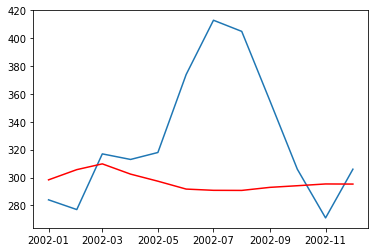

In [115]:
plt.plot(test)
plt.plot(pred, color='red')

As we can see ARIMA model doesn't work good for seasonal data